In [1]:
!ls data.tx/

PRJEB36722_XENTRtx_Pelzer2021.kallisto_tpm.txt
PRJNA573657_XENLAtx_Belrose2020_frogON.kallisto_tpm.txt
PRJNA573657_XENLAtx_Belrose2020_frogSC.kallisto_tpm.txt
PRJNA573657_XENLAtx_Belrose2020_tadpoleSC.kallisto_tpm.txt


In [14]:
tf_list = []
f_tf = open('data.tx/TF_names_v_1.01.txt', 'r')
for line in f_tf:
    tf_list.append(line.strip())
f_tf.close()
                   
print(tf_list[:5])

['AC008770.3', 'AC023509.3', 'AC092835.1', 'AC138696.1', 'ADNP']


In [21]:
import pandas as pd
import numpy as np

def read_gene_table(tmp_filename):
    rv = dict()
    f = open(tmp_filename, 'r')
    h_tokens = f.readline().strip().split("\t")
    for line in f:
        tokens = line.strip().split("\t")
        tmp_id = tokens[0]
        tmp_gene = tmp_id.split('|')[0]
        
        is_tf = -1
        for tmp_tf in tf_list:
            if tmp_gene.upper().find(tmp_tf.upper()) >= 0:
                is_tf = 1
                break
        
        if is_tf < 0:
            continue
                
        if tmp_gene not in rv:
            rv[tmp_gene] = np.array([float(x) for x in tokens[1:]])
        else:
            rv[tmp_gene] += np.array([float(x) for x in tokens[1:]])
    f.close()
    return pd.DataFrame.from_dict(rv,  orient='index', columns=h_tokens[1:])

In [22]:
pelzer2021 = read_gene_table('data.tx/PRJEB36722_XENTRtx_Pelzer2021.kallisto_tpm.txt')
pelzer2021.head()

,0dpa_1,0dpa_2,0dpa_3,1dpa_1,1dpa_2,1dpa_3,3dpa_1,3dpa_2,3dpa_3
42Sp50,0.279,0.690,0.164,0.330,0.295,0.204,0.258,0.369,0.486
Xetrov90000005m.g,1.821,2.722,1.646,1.836,2.159,3.099,1.819,2.339,2.070
Xetrov90000032m.g,52.857,144.387,43.535,55.849,75.425,118.453,118.426,153.369,88.107
Xetrov90000035m.g,2.061,2.031,1.583,0.917,1.191,1.906,2.523,4.084,2.011
Xetrov90000046m.g,15.268,25.264,13.385,13.077,17.077,22.688,22.321,27.635,18.934


In [23]:
pelzer2021_foxm = pelzer2021.filter(items=['foxm1', 'foxj1', 'foxj1.2', 'foxj2', 'foxj3'], axis="index")
pelzer2021_foxm.head()

,0dpa_1,0dpa_2,0dpa_3,1dpa_1,1dpa_2,1dpa_3,3dpa_1,3dpa_2,3dpa_3
foxm1,2.138,0.280,0.730,0.972,0.781,1.201,13.746,11.028,10.752
foxj1,11.442,14.133,8.795,32.734,38.612,38.934,72.901,62.933,54.174
foxj1.2,2.384,2.937,2.366,2.817,3.360,3.361,8.931,7.365,6.821
foxj2,23.511,31.322,16.013,28.237,25.318,26.483,29.827,25.448,18.759
foxj3,2.942,3.478,2.909,4.251,3.620,3.939,4.966,5.102,4.474


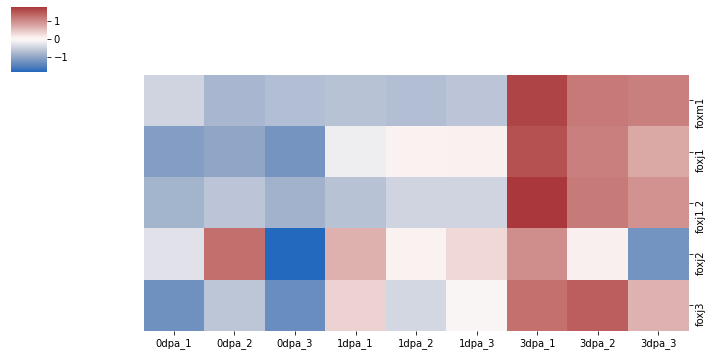

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(pelzer2021_foxm, z_score=0, row_cluster=False, col_cluster=False, cmap="vlag", figsize=(10,5))

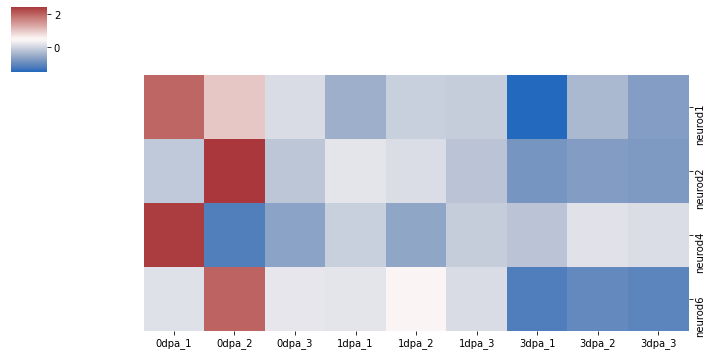

In [6]:
pelzer2021_neurod = pelzer2021.filter(items=['neurod1', 'neurod2', 'neurod4', 'neurod6'], axis="index")
pelzer2021_neurod.head()
sns.clustermap(pelzer2021_neurod, z_score=0, row_cluster=False, col_cluster=False, cmap="vlag", figsize=(10,5))

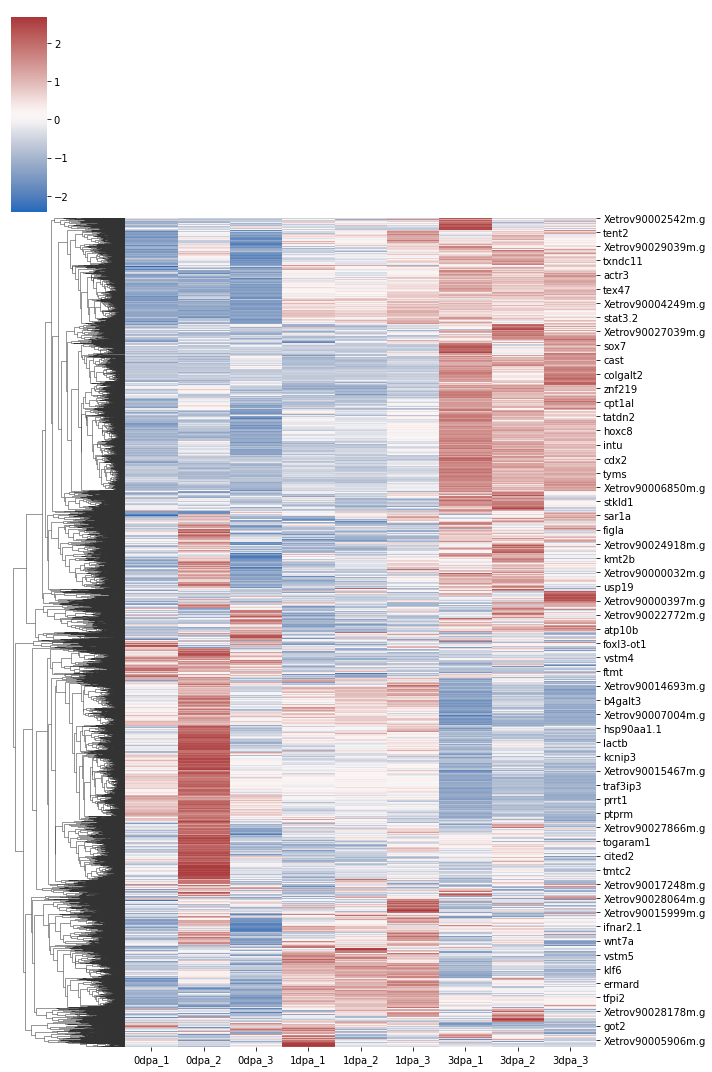

In [24]:
sns.clustermap(pelzer2021, z_score=0, row_cluster=True, col_cluster=False, cmap="vlag", figsize=(10,15))

In [25]:
belrose2020_frogSC = read_gene_table('data.tx/PRJNA573657_XENLAtx_Belrose2020_frogSC.kallisto_tpm.txt')
belrose2020_tadpoleSC = read_gene_table('data.tx/PRJNA573657_XENLAtx_Belrose2020_tadpoleSC.kallisto_tpm.txt')
belrose2020_frogSC.head()
belrose2020_tadpoleSC.head()

,tadpoleSC+day0_1,tadpoleSC+day0_2,tadpoleSC+day0_3,tadpoleSC+SCI+day3_1,tadpoleSC+SCI+day3_2,tadpoleSC+SCI+day3_3,tadpoleSC+SCI+week1_1,tadpoleSC+SCI+week1_2,tadpoleSC+SCI+week1_3,tadpoleSC+SCI+week3_1,tadpoleSC+SCI+week3_2,tadpoleSC+SCI+week3_3,tadpoleSC+week1_1,tadpoleSC+week1_2,tadpoleSC+week1_3,tadpoleSC+week3_1,tadpoleSC+week3_2,tadpoleSC+week3_3
42sp43.L,0.083,0.000,0.129,0.157,0.053,0.000,0.045,0.172,0.000,0.000,0.059,0.105,0.000,0.059,0.059,0.000,0.062,0.055
42sp50.L,1.442,1.225,1.744,1.799,1.386,1.979,1.695,1.673,2.814,2.223,2.877,2.129,2.559,2.965,3.201,3.322,2.569,2.928
Xetrov90000026m.S,0.337,0.429,0.077,0.419,0.427,0.324,0.322,0.516,0.842,0.741,0.425,0.563,0.548,0.530,0.525,1.035,0.448,0.790
Xetrov90000032m.L,0.000,0.000,0.000,0.139,0.000,0.000,0.000,0.204,0.000,0.172,0.000,0.187,0.198,0.000,0.420,0.187,0.219,0.590
Xetrov90000095m.L,0.769,0.404,0.397,0.120,0.650,0.319,0.138,0.352,0.543,0.892,0.542,0.161,0.000,0.363,0.362,0.968,0.568,0.509


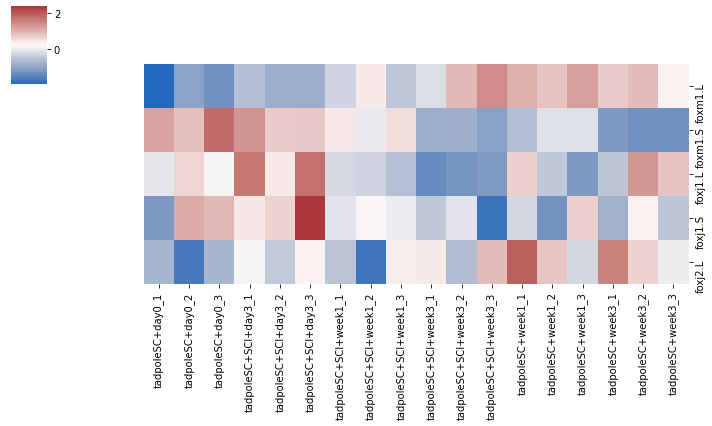

In [29]:
belrose2020_tadpoleSC_foxm = belrose2020_tadpoleSC.filter(items=['foxm1.L', 'foxm1.S', 'foxj1.L', 'foxj1.S', 'foxj2.L', 'foxj2.S'], axis="index")
belrose2020_tadpoleSC_foxm.head()
sns.clustermap(belrose2020_tadpoleSC_foxm, z_score=0, row_cluster=False, col_cluster=False, cmap="vlag", figsize=(10,6))

In [ ]:
belrose2020_frogSC_foxm = belrose2020_frogSC.filter(items=['foxm1.L', 'foxm1.S', 'foxj1.L', 'foxj1.S'], axis="index")
belrose2020_frogSC_foxm.head()
sns.clustermap(belrose2020_frogSC_foxm, z_score=0, row_cluster=False, col_cluster=False, cmap="vlag", figsize=(10,6))

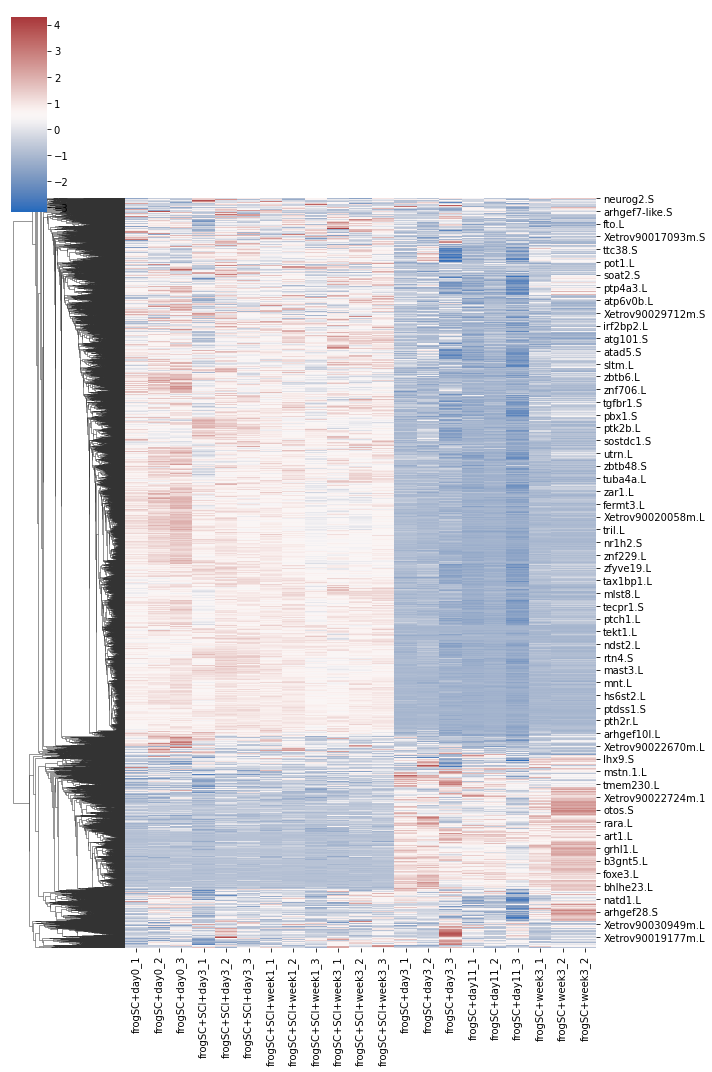

In [27]:
sns.clustermap(belrose2020_frogSC, z_score=0, row_cluster=True, col_cluster=False, cmap="vlag", figsize=(10,15))

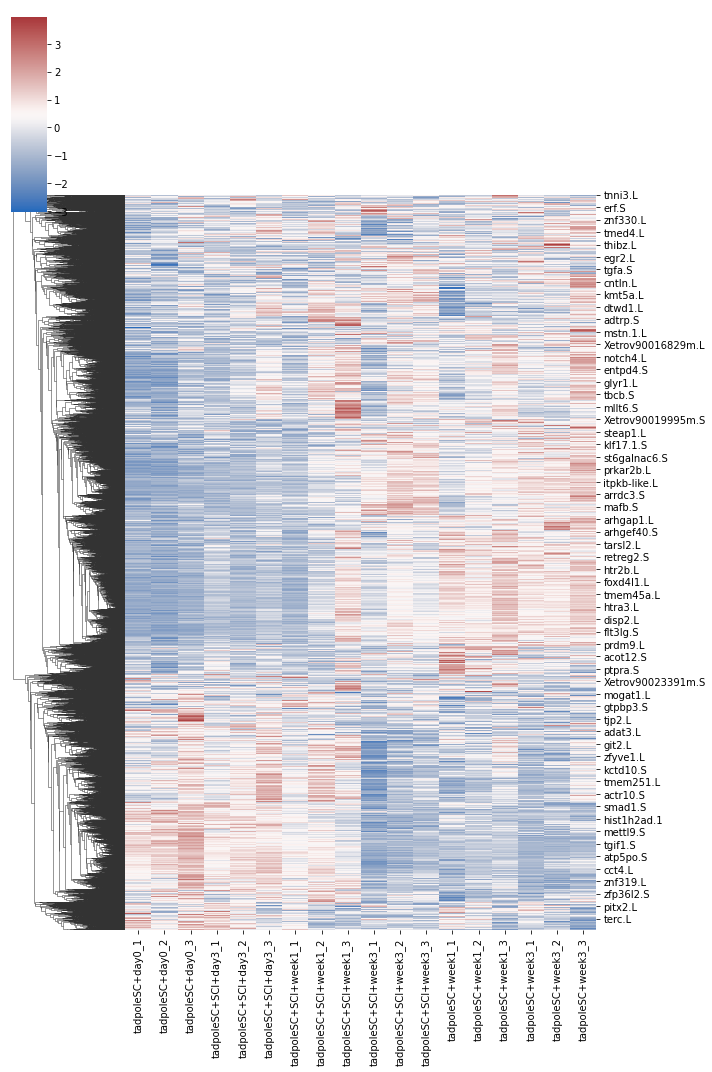

In [28]:
sns.clustermap(belrose2020_tadpoleSC, z_score=0, row_cluster=True, col_cluster=False, cmap="vlag", figsize=(10,15))

In [30]:
herman2018 = read_gene_table('data.tx/PRJNA377918_PETMAtx_Herman2018.kallisto_tpm.txt')
herman2018.head()

,SCctrl,SC+6hpi,SC+1dpi,SC+3dpi,SC+1wk,SC+2wk,SC+3wk,SC+4wk,SC+5wk,SC+6wk,SC+12wk
A3GALT2,0.105,1.499,0.409,1.116,0.797,0.656,0.598,0.359,0.794,0.638,1.042
AARS2,0.541,2.605,1.310,1.076,1.439,0.897,0.721,0.698,1.686,2.514,1.608
ACOT11,1.493,46.044,2.294,1.333,3.088,2.050,3.172,1.975,6.092,3.698,7.469
ADARB1,0.424,1.363,0.504,0.590,0.495,0.238,0.326,0.542,0.943,1.798,1.111
ANTKMT,1.472,5.359,2.303,2.540,2.311,1.588,2.431,1.863,3.654,3.373,3.361


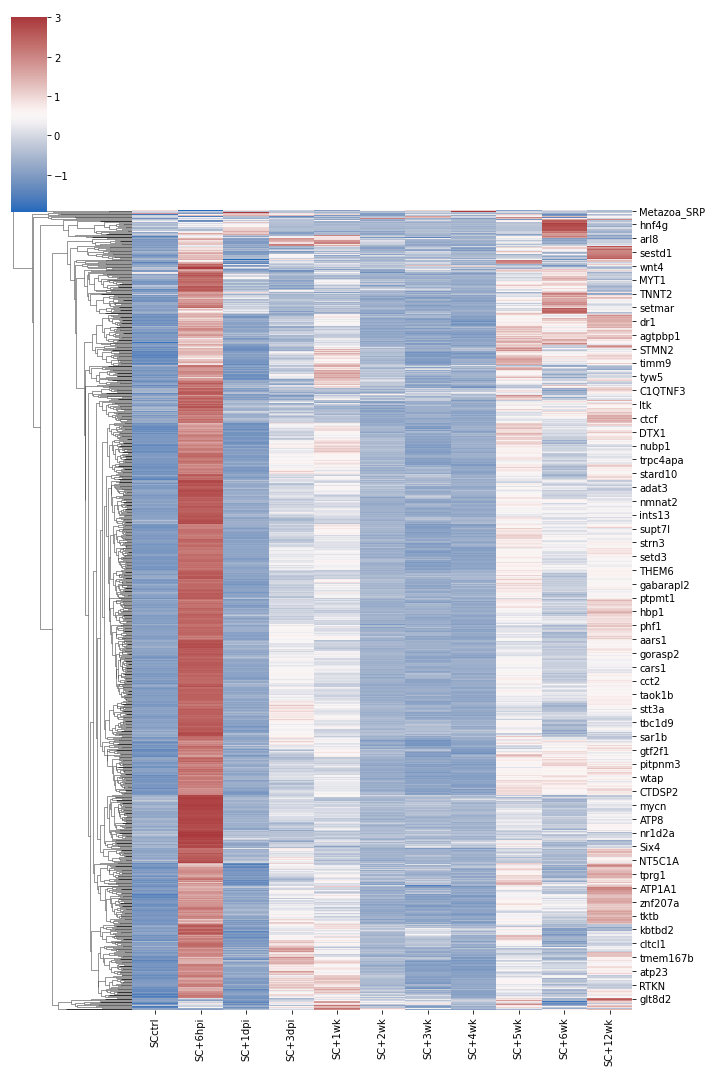

In [31]:
sns.clustermap(herman2018, z_score=0, row_cluster=True, col_cluster=False, cmap="vlag", figsize=(10,15))

In [32]:
shi2017 = read_gene_table('data.tx/PRJNA318311_RATtx_Shi2017.kallisto_tpm.txt')
shi2017.head()

,sham_A1,sham_A2,sham_A3,day1_B2,day1_B3,day6_C1,day6_C2,day6_C3,day28_D1,day28_D2,day28_D3
A3galt2,5.761,7.927,5.175,20.736,29.459,33.954,36.614,25.579,13.684,11.167,18.573
A4galt,0.372,0.259,0.061,0.162,0.042,0.202,0.867,0.000,0.128,0.219,0.743
Aadat,4.955,3.719,4.523,5.042,3.691,5.458,3.525,6.064,4.953,4.474,6.851
Aanat,0.572,1.025,0.323,0.853,0.558,0.199,0.217,0.645,0.281,0.288,0.070
Aar2,20.685,18.894,20.872,16.651,14.971,16.293,15.570,17.195,15.318,14.323,15.021


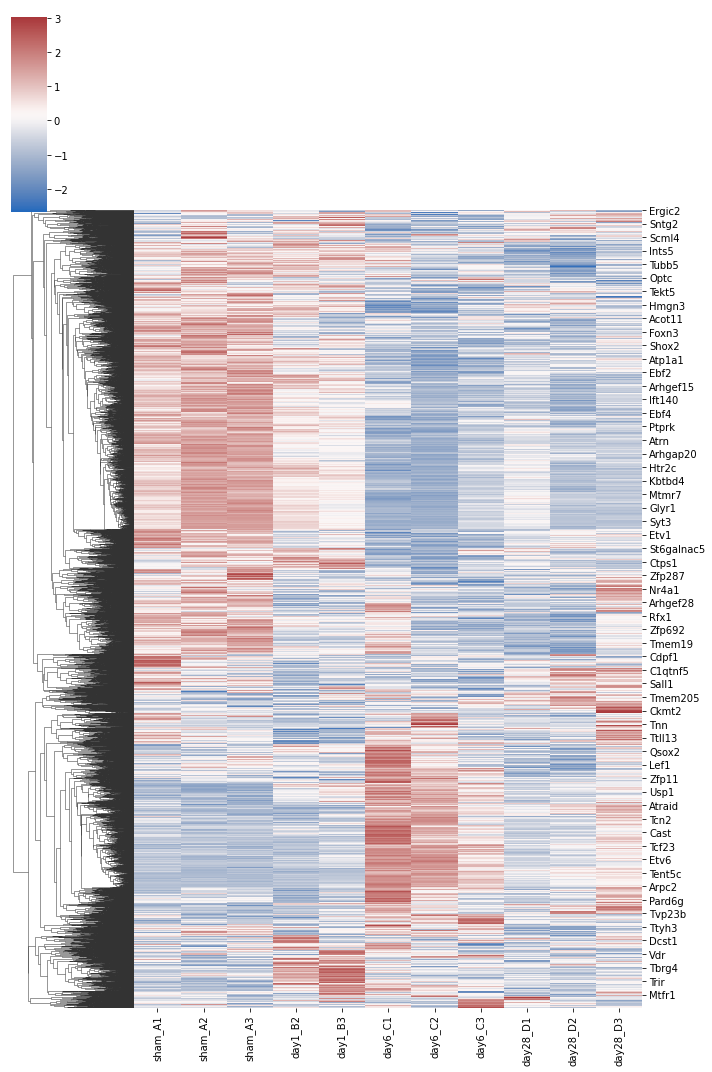

In [33]:
sns.clustermap(shi2017, z_score=0, row_cluster=True, col_cluster=False, cmap="vlag", figsize=(10,15))